# Cosmological Collider Physics (Solutions)

<div class="alert alert-block alert-info"> In this notebook, you will first play with massive fields in de Sitter, and then discover the famous cosmological collider signal. Caution, some cells will take quite some time to execute (roughly a few minutes).</div>

In [1]:
# Import the standard Python packages
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# For Latex-style labels
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r"\usepackage{bm}")

# Import CosmoFlow modules (they must be located in the same parent folder as this notebook)
from Parameters import parameters
from Theory import theory
from Solver import solver

In [2]:
# Define the numerical i\epsilon prescription
def adiabatic(N_load, DeltaN, N_exit):
    return (np.tanh((N_load - N_exit + DeltaN - 0.5)/0.1) + 1)/2

## Massive Fields in de Sitter

<div class="alert alert-block alert-info"> <strong>Task:</strong> Write a function massive(m) that takes the mass as an input, and outputs the number of $e$-folds array N and the two-point function of the massive field. You will store the data up to 20 efolds after horizon crossing. </div>

In [28]:
def massive(m):
    n = 10000 # Number of points for the parameter evaluation
    N_load = np.linspace(-10, 20, n) # Time grid array in e-folds for the parameters
    DeltaN = 3 # Number of e-folds before horizon crossing
    
    N_exit = 0
    k = 1 # Mode corresponding to N = 0 horizon exit
    k1, k2, k3 = k, k, k # Kinematic configuration for 3-pt function (here equilateral)
    
    # Theory 
    H_load = np.ones(n) # Hubble scale
    cs_load = 1 * np.ones(n) # Speed of sound for phi
    m_load = m * np.ones(n) # Mass of Psi
    rho_load = 0 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Linear mixing strength
    g_load = 1 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Cubic coupling
    
    # Load the parameters and define continuous functions
    param = parameters(N_load, H_load, cs_load, m_load, rho_load, g_load) # Load the class parameters
    interpolated = param.output() # Define list with continuous parameters

    # Numerical parameters
    Nspan = np.linspace(-10, 20, 1000) # Time span in e-folds for the numerical integration
    Nfield = 2 # Number of fields
    Rtol, Atol = 1e-4, 1e-180 # Relative and absolute tolerance of the integrator
    N_exit = 0 # Horizon exit for a mode
    Ni, Nf = N_exit - DeltaN, 20 # Sets initial and final time for integration
    N = np.linspace(Ni, Nf, 1000) # Define the time array for output correlators

    # Initialise the integrator
    theo = theory(N = Nspan, Nfield = Nfield, interpolated = interpolated)
    
    s = solver(Nspan = N, Nfield = Nfield, interpolated = interpolated, Rtol = Rtol, Atol = Atol)
    f = s.f_solution(k1 = k1, k2 = k2, k3 = k3)
    return N, f[0][1, 1]

<div class="alert alert-block alert-info"> <strong>Task:</strong> Plot the time evolution of the massive two-point correlator (rescaled by a^3) for m/H=1.6, m/H=2 and m/H=3. Comment. 
<ul>
    <li>What happens for m/H<3/2?</li>
  </ul>
</div>

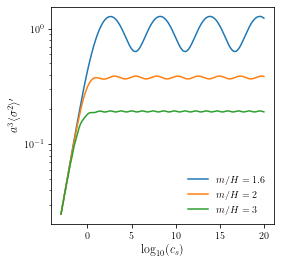

In [29]:
fig = plt.figure(figsize = (4, 4))
ax = fig.add_subplot()


N, s = massive(m = 1.6)
plt.semilogy(N, abs(s)*np.exp(3*N), label = "$m/H=1.6$")

N, s = massive(m = 2)
plt.semilogy(N, abs(s)*np.exp(3*N), label = "$m/H=2$")

N, s = massive(m = 3)
plt.semilogy(N, abs(s)*np.exp(3*N), label = "$m/H=3$")

ax.set_xlabel(r"$\log_{10}(c_s)$", fontsize = 12)
ax.set_ylabel(r"$a^3 \langle\sigma^2\rangle'$", fontsize = 12)
ax.legend(frameon = False)

<div class="alert alert-block alert-info"> <strong>Task:</strong> Plot the amplitude of the super-horizon oscillations of the massive two-point correlator as function of the mass for m/H from 1.6 to 3 with 15 points. 
<ul>
    <li>How does it scale?</li>
  </ul>
</div>

Text(0, 0.5, 'Amplitude')

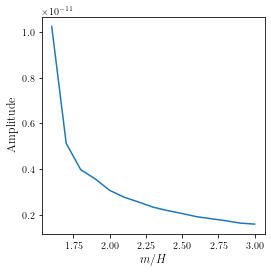

In [36]:
fig = plt.figure(figsize = (4, 4))
ax = fig.add_subplot()

n = 15
mass = np.linspace(1.6, 3, n)
amplitude = []

for i in range(n):
    N, s = massive(m = mass[i])
    a_max, a_min = np.max(s[500:]), np.min(s[500:])
    amplitude.append(a_max - a_min)

ax.plot(mass, amplitude)
    
ax.set_xlabel(r"$m/H$", fontsize = 12)
ax.set_ylabel(r"Amplitude", fontsize = 12)

## Cosmological Collider Signals

<div class="alert alert-block alert-info"> <strong>Task:</strong> Understand and execute the following script.
    </div>

In [40]:
def Soft_Limit(kappa, cs, m, rho):
    n = 10000 # Number of points for the parameter evaluation
    N_load = np.linspace(-10, 20, n) # Time grid array in e-folds for the parameters
    DeltaN = 5.5 # Number of e-folds before horizon crossing
    
    N_exit = 0
    k = 1 # Mode corresponding to N = 0 horizon exit
    k1, k2, k3 = k/kappa, k/kappa, k # Kinematic configuration for 3-pt function
    
    # Theory 
    H_load = np.ones(n) # Hubble scale
    cs_load = cs * np.ones(n) # Speed of sound for phi
    m_load = m * np.ones(n) # Mass of Psi
    rho_load = rho * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Linear mixing strength
    g_load = 1 * np.ones(n) * adiabatic(N_load, DeltaN, N_exit) # Cubic coupling
    
    # Load the parameters and define continuous functions
    param = parameters(N_load, H_load, cs_load, m_load, rho_load, g_load) # Load the class parameters
    interpolated = param.output() # Define list with continuous parameters

    # Numerical parameters
    Nspan = np.linspace(-10, 20, 1000) # Time span in e-folds for the numerical integration
    Nfield = 2 # Number of fields
    Rtol, Atol = 1e-3, 1e-20 # Relative and absolute tolerance of the integrator
    N_exit = 0 # Horizon exit for a mode
    Ni, Nf = N_exit - DeltaN, 10 # Sets initial and final time for integration
    N = np.linspace(Ni, Nf, 1000) # Define the time array for output correlators

    # Initialise the integrator
    theo = theory(N = Nspan, Nfield = Nfield, interpolated = interpolated)
    
    s = solver(Nspan = N, Nfield = Nfield, interpolated = interpolated, Rtol = Rtol, Atol = Atol)
    f = s.f_solution(k1 = k1, k2 = k2, k3 = k3)
    
    #two_ptk1, two_ptk3, three_pt = f[0][0, 0], f[2][0, 0], f[6][0, 0, 0]
    #return N, two_ptk1, two_ptk3, (k1*k2*k3)**2 * three_pt # Equivalent to shape function
    three_pt = f[6][0, 0, 0][-1]
    return (k1*k2*k3)**2 * three_pt # Equivalent to shape function

<div class="alert alert-block alert-info"> <strong>Task:</strong> Understand and execute the following script for cs=0.1, m/H=0.1 and rho/H=5. Caution, this takes roughly 10 minutes to run.
    </div>

In [41]:
from joblib import Parallel, delayed # Needed for parallelisation
import time # Record the running time

cs, m, rho = 0.1, 0.1, 5

n_pt = 50
kappa = np.logspace(-2, 0, n_pt) # k1/k3 with k1=k2

def process(i):
    return Soft_Limit(kappa = kappa[i], cs = cs, m = m, rho = rho)

start_time = time.time() # Start recording runtime
X = Parallel(n_jobs = 6)(delayed(process)(i) for i in range(n_pt)) # n_jobs is the number of cores
print("--- %s seconds ---" % (time.time() - start_time)) # Print runtime

# Save files
np.save("S_CC.npy", X)
np.save("kappa_CC.npy", kappa)

--- 551.227648973465 seconds ---


<div class="alert alert-block alert-info"> <strong>Task:</strong> Load the result and plot the shape function (divided by kappa) as function of kappa. Comment.
    </div>

Text(0, 0.5, "$(k_1/k_3)\\,(k_1k_2k_3)^2\\,\\langle\\varphi_{\\bm{k}_1} \\varphi_{\\bm{k}_2} \\varphi_{\\bm{k}_3}\\rangle'$")

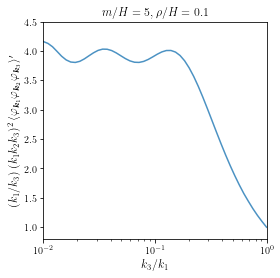

In [42]:
# Define figure
fig = plt.figure(figsize = (4, 4))
ax = fig.add_subplot()

# Load the data
kappa = np.load("kappa_CC.npy")
S = np.load("S_CC.npy")

# Axis limits
ax.set_ylim([0.8, 4.5])

ax.set_xscale("log")
ax.set_xlim((np.min(kappa), np.max(kappa)))

# Plot rescaled shape function
ax.semilogx(kappa, S/kappa/S[-1], alpha = 0.8, label = "$m/H = 5, \\rho/H = 0.1$")

# Labels
ax.set_title("$m/H = 5, \\rho/H = 0.1$", fontsize = 12)
ax.set_xlabel(r"$k_3/k_1$", fontsize = 12)
ax.set_ylabel(r"$(k_1/k_3)\,(k_1k_2k_3)^2\,\langle\varphi_{\bm{k}_1} \varphi_{\bm{k}_2} \varphi_{\bm{k}_3}\rangle'$", fontsize = 12)


If you are interested and brave enough, integrate out the heavy field in a local manner by writing 
\begin{equation}
    \Psi = \frac{\rho}{m^2} \dot{\varphi}\,,
\end{equation}
and plug the result back in the action. We end up with a new single-field effective theory. Implement this new theory in CosmoFlow (create a new folder and appropriately modify the necessary modules), and recompute the bispectrum shape, scanning the squeezed limit. What are your conclusions? 